# Index Preprocessing

## 1. Tale ID

In [30]:
# import libraries
import pandas as pd
import numpy as np
from pathlib import Path
import re
import os
import ast
import matplotlib.pyplot as plt

In [2]:
# open index file
project_root = Path("/Users/eugenia/Desktop/thesis/magic_tagger")

excel_path = project_root / "data" / "index" / "corpus_a_index_clean_atu.xlsx"
df = pd.read_excel(excel_path)

display(df.head())

,tale_id,collection,volume_no,source_ref,digital_carrier,rights_status,narrator,collector_1,collector_2,collector_3,...,local_type,type_code_1,type_code_2,type_code_3,type_code_4,mapping_status,mapping_relation,mapping_date,mapping_by,gold_status
0,era_vene_2_605_4,"ERA, Vene",2,"ERA, Vene 2, 605/21 (4)",scan_only,open,"Nimi: Денисиха, Vanus/Sünniaasta: 75 л.",Федор Коняев,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing
1,era_vene_5_167_9,"ERA, Vene",5,"ERA, Vene 5, 167/9 (9)",scan_only,open,NaN,Nina Valkevitš,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing
2,era_vene_6_379_6,"ERA, Vene",6,"ERA, Vene 6, 379/81",scan_only,open,"Nimi: Lewonty Borhov, Vanus/Sünniaasta: 63 a.",M. Sokolov,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing
3,era_vene_7_125_1,"ERA, Vene",7,"ERA, Vene 7, 125/8 (1)",scan_only,open,"Nimi: Александр Кельнер, Märkus: слышал от баб...",Александр Кельнер,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing
4,rkm_vene_3_257_116,"RKM, Vene",3,"RKM, Vene 3, 257/62 (116)",scan_only,open,"Nimi: Анастасия Кодар, Vanus/Sünniaasta: 1909,...",Ольга Гильдебрандт,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing


In [3]:
# Normalize (optional but recommended for QC): strip spaces
s = df["tale_id"].astype(str).str.strip()

# Basic uniqueness check
n_total = len(s)
n_unique = s.nunique(dropna=False)
n_dups = n_total - s.dropna().nunique()

print(f"Rows total: {n_total}")
print(f"Unique {'tale_id'} (including NaN as a value): {n_unique}")
print(f"Duplicate {'tale_id'} rows (excluding NaN): {(s.duplicated(keep=False) & s.notna()).sum()}")


Rows total: 113
Unique tale_id (including NaN as a value): 113
Duplicate tale_id rows (excluding NaN): 0


## 2. Volume ID

In [4]:
# volume id based on text id
df["volume_id"] = df["tale_id"].str.split("_").str[:3].str.join("_")

df.head()

,tale_id,collection,volume_no,source_ref,digital_carrier,rights_status,narrator,collector_1,collector_2,collector_3,...,type_code_1,type_code_2,type_code_3,type_code_4,mapping_status,mapping_relation,mapping_date,mapping_by,gold_status,volume_id
0,era_vene_2_605_4,"ERA, Vene",2,"ERA, Vene 2, 605/21 (4)",scan_only,open,"Nimi: Денисиха, Vanus/Sünniaasta: 75 л.",Федор Коняев,NaN,NaN,...,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing,era_vene_2
1,era_vene_5_167_9,"ERA, Vene",5,"ERA, Vene 5, 167/9 (9)",scan_only,open,NaN,Nina Valkevitš,NaN,NaN,...,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing,era_vene_5
2,era_vene_6_379_6,"ERA, Vene",6,"ERA, Vene 6, 379/81",scan_only,open,"Nimi: Lewonty Borhov, Vanus/Sünniaasta: 63 a.",M. Sokolov,NaN,NaN,...,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing,era_vene_6
3,era_vene_7_125_1,"ERA, Vene",7,"ERA, Vene 7, 125/8 (1)",scan_only,open,"Nimi: Александр Кельнер, Märkus: слышал от баб...",Александр Кельнер,NaN,NaN,...,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing,era_vene_7
4,rkm_vene_3_257_116,"RKM, Vene",3,"RKM, Vene 3, 257/62 (116)",scan_only,open,"Nimi: Анастасия Кодар, Vanus/Sünniaasta: 1909,...",Ольга Гильдебрандт,NaN,NaN,...,NaN,NaN,NaN,NaN,missing,exact,20.12.2025,Evgeniia Vdovichenko,missing,rkm_vene_3


In [37]:
df.columns

Index(['tale_id', 'collection', 'volume_no', 'source_ref', 'digital_carrier',
       'rights_status', 'narrator', 'collector_1', 'collector_2',
       'collector_3', 'collector_4', 'collector_5', 'narrator_school',
       'recording_parish', 'recording_place', 'narrator_origin_parish',
       'narrator_origin_place', 'recorded_date_start', 'recorded_date_end',
       'content_description', 'genre_1', 'genre_2', 'genre_3', 'subgenre',
       'folklore_category', 'local_type_scheme', 'local_type', 'type_code_1',
       'type_code_2', 'type_code_3', 'type_code_4', 'mapping_status',
       'mapping_relation', 'mapping_date', 'mapping_by', 'gold_status',
       'volume_id', 'gold_atu_parsed', 'gold_atu_raw_multi',
       'gold_uncertain_flag', 'gold_parse_error_flag', 'amb_reason',
       'eval_included', 'gold_atu_codes', 'gold_atu_bases'],
      dtype='object')

In [5]:
pattern_ok = r"^[a-z]+_[a-z]+_\d+$"
mask_empty = df["volume_id"].isna() | (df["volume_id"].str.len() == 0)
mask_badfmt = ~df["volume_id"].fillna("").str.match(pattern_ok)

qc_empty = df[mask_empty | mask_badfmt].copy()
qc_empty["qc_reason"] = ""
qc_empty.loc[mask_empty, "qc_reason"] = "empty_volumeid"
qc_empty.loc[~mask_empty & mask_badfmt, "qc_reason"] = "bad_format_volumeid"

print(f"Rows total: {len(df)}")
print(f"QC issues (empty or bad format VolumeID): {len(qc_empty)}")

Rows total: 113
QC issues (empty or bad format VolumeID): 0


In [6]:
# 3) QC: Mapping conflicts (one VolumeID -> multiple Collection or VolumeNo)
PROBLEMS_MAPPING_PATH = "qc_volumeid_mapping_conflicts.csv"
conflicts = []

# Only run checks if the columns exist
has_collection = "collection" in df.columns
has_volno = "volume_no" in df.columns

if has_collection or has_volno:
    group = df.groupby("volume_id", dropna=False)

    if has_collection:
        # count distinct Collection values per VolumeID
        coll_counts = group["collection"].nunique(dropna=False)
        bad_coll = coll_counts[coll_counts > 1].index.tolist()
        if bad_coll:
            tmp = df[df["volume_id"].isin(bad_coll)].copy()
            tmp["qc_reason"] = "VolumeID maps to multiple Collection values"
            conflicts.append(tmp)

    if has_volno:
        # count distinct VolumeNo values per VolumeID
        vol_counts = group["volume_no"].nunique(dropna=False)
        bad_vol = vol_counts[vol_counts > 1].index.tolist()
        if bad_vol:
            tmp = df[df["volume_id"].isin(bad_vol)].copy()
            tmp["qc_reason"] = "VolumeID maps to multiple VolumeNo values"
            conflicts.append(tmp)

    if conflicts:
        qc_map = pd.concat(conflicts, ignore_index=True)
        qc_map.to_csv(PROBLEMS_MAPPING_PATH, index=False)
        print(f"QC mapping conflicts: {len(qc_map)} rows")
        print(f"Saved: {PROBLEMS_MAPPING_PATH}")
    else:
        print("QC mapping conflicts: none found (for available columns).")
else:
    print(f"Skipping mapping conflict QC: '{collection}' and '{volume_no}' columns not found.")


QC mapping conflicts: none found (for available columns).


In [7]:
# check unusual cases 
bad = df[df["tale_id"].str.count("_") < 2]  # if tale id is shorter than we expected
print("Bad rows:", len(bad))

Bad rows: 0


In [8]:
print("\nTop 10 volume ID counts:")
df["volume_id"].value_counts().head(10)


Top 10 volume ID counts:


volume_id
era_vene_13    22
era_vene_12    10
era_vene_6      9
era_vene_2      7
era_vene_7      7
era_vene_5      6
era_vene_1      6
tru_vkk_13      5
era_vene_15     5
tru_vkk_32      4
Name: count, dtype: int64

In [9]:
df.to_csv(project_root / "data" / "index" / "corpus_a_index_clean_atu_volumeid.csv", index=False)

## 3. ATU Type

After the manual review and harmonization of type annotations, we ran an automated ATU parser as a dataset-level quality-control step. The parser validates that each record contains type codes in an admissible format (including lettered subtypes and asterisk-marked refinements) and checks whether at least one of the assigned codes falls within the target scope of magic tales (ATU 300–749). 

In [20]:
# --- CONFIG ---
TEXTID_COL   = "tale_id"
VOLUMEID_COL = "volume_id"
GOLD_COLS    = ["type_code_1", "type_code_2", "type_code_3", "type_code_4"]

ATU_MIN, ATU_MAX = 300, 749  # tales of magic

OUT_EXCLUDED = project_root / "data" / "index" / "ambiguous_excluded.csv"
OUT_ENRICHED = project_root / "data" / "index" / "corpus_index_with_eval_flags.csv"
# --------------

# checks
for col in [TEXTID_COL, VOLUMEID_COL, *GOLD_COLS]:
    if col not in df.columns:
        raise ValueError(f"Missing column '{col}'. Available: {list(df.columns)}")

# Uncertainty markers: '?' or explicit words. NOTE: '*' is NOT uncertainty.
UNCERTAIN_PAT = re.compile(r"\b(ambig|uncertain|variant|maybe|unknown|см\.|see)\b|\?", flags=re.I)

# Accept ATU-like codes:
#  - 300
#  - 510A / 510B / 300AA (up to 2 letters just in case)
#  - 300A* / 327* (asterisk is part of the class)
# Also accepts codes embedded in text: "ATU 510A", "510A (cf.)", etc.
ATU_CODE_RE = re.compile(r"(?<!\d)(\d{2,4})([A-Za-z]{1,2})?(\*)?", flags=re.U)

def parse_one_label(x):
    """
    Returns:
      codes: list[str]     e.g. ["510A", "300A*"]
      bases: list[int]     e.g. [510, 300]  (for scope checks)
      uncertain_flag: bool
      raw_str: str
      parse_ok: bool       True if empty OR at least one code found; False if non-empty but no codes found
    """
    if pd.isna(x):
        return [], [], False, "", True

    raw = str(x).strip()
    if raw == "" or raw.lower() in {"nan", "none"}:
        return [], [], False, raw, True

    uncertain = bool(UNCERTAIN_PAT.search(raw))

    matches = ATU_CODE_RE.findall(raw)
    if not matches:
        return [], [], uncertain, raw, False

    codes = []
    bases = []
    for num, suf, star in matches:
        base = int(num)
        suf = (suf or "").upper()
        star = "*" if star else ""
        code = f"{num}{suf}{star}"
        codes.append(code)
        bases.append(base)

    # dedupe (preserve order)
    seen = set()
    codes_u, bases_u = [], []
    for c, b in zip(codes, bases):
        if c not in seen:
            seen.add(c)
            codes_u.append(c)
            bases_u.append(b)

    return codes_u, bases_u, uncertain, raw, True

def collect_gold(row):
    """
    Combines multiple columns into:
    - gold_codes: list[str]   canonical ATU-like codes, preserving '*' and letter suffixes
    - gold_bases: list[int]   numeric base codes for scope checks
    - raw_values: list[str]   e.g. ["type_code_1=510A*", "type_code_2=300"]
    - has_uncertainty: bool
    - has_parse_error: bool   any non-empty cell with no parseable code
    """
    gold_codes = []
    gold_bases = []
    raw_vals = []
    has_uncertainty = False
    has_parse_error = False

    for col in GOLD_COLS:
        codes, bases, uncertain, raw, ok = parse_one_label(row[col])

        if raw != "":
            raw_vals.append(f"{col}={raw}")

        if uncertain:
            has_uncertainty = True

        if (raw != "") and (not ok):
            has_parse_error = True

        gold_codes.extend(codes)
        gold_bases.extend(bases)

    # dedupe overall, preserve order
    seen_c = set()
    codes_u = []
    for c in gold_codes:
        if c not in seen_c:
            seen_c.add(c)
            codes_u.append(c)

    seen_b = set()
    bases_u = []
    for b in gold_bases:
        if b not in seen_b:
            seen_b.add(b)
            bases_u.append(b)

    return codes_u, bases_u, raw_vals, has_uncertainty, has_parse_error

tmp = df.apply(collect_gold, axis=1, result_type="expand")
df["gold_atu_codes"] = tmp[0]  # list[str], preserves '*' and letters
df["gold_atu_bases"] = tmp[1]  # list[int]
df["gold_atu_raw_multi"] = tmp[2].apply(lambda x: "; ".join(x))
df["gold_uncertain_flag"] = tmp[3]
df["gold_parse_error_flag"] = tmp[4]

def any_in_scope(bases):
    return any(ATU_MIN <= n <= ATU_MAX for n in bases)

# Build reasons
df["amb_reason"] = ""

# 1) no gold at all (no codes found AND no parse errors => truly empty)
mask_no_gold = df["gold_atu_codes"].apply(len).eq(0) & (~df["gold_parse_error_flag"])
df.loc[mask_no_gold, "amb_reason"] = "missing_gold_atu"

# 2) parse errors (non-empty but not parseable)
mask_parse_err = df["gold_parse_error_flag"]
df.loc[mask_parse_err, "amb_reason"] = "bad_format_or_unparseable_label"

# 3) uncertainty marker (?, ambig, etc.)
mask_uncertain = df["amb_reason"].eq("") & df["gold_uncertain_flag"]
df.loc[mask_uncertain, "amb_reason"] = "bad_format_or_uncertain_label"

# 4) out of scope (has bases, no uncertainty, no parse err, but none in range)
mask_out_scope = (
    df["amb_reason"].eq("")
    & df["gold_atu_bases"].apply(len).gt(0)
    & (~df["gold_uncertain_flag"])
    & (~df["gold_parse_error_flag"])
    & (~df["gold_atu_bases"].apply(any_in_scope))
)
df.loc[mask_out_scope, "amb_reason"] = "out_of_scope_gold_atu"

df["eval_included"] = df["amb_reason"].eq("")

# Save outputs
OUT_EXCLUDED.parent.mkdir(parents=True, exist_ok=True)

excluded = df[~df["eval_included"]].copy()
excluded = excluded[
    [TEXTID_COL, VOLUMEID_COL, *GOLD_COLS, "gold_atu_raw_multi", "gold_atu_codes", "gold_atu_bases", "amb_reason"]
].sort_values(["amb_reason", VOLUMEID_COL, TEXTID_COL])

excluded.to_csv(OUT_EXCLUDED, index=False)
df.to_csv(OUT_ENRICHED, index=False)

print("TOTAL:", len(df))
print("INCLUDED:", int(df["eval_included"].sum()))
print("EXCLUDED:", int((~df["eval_included"]).sum()))
print("\nExcluded by reason:")
print(excluded["amb_reason"].value_counts())
print("\nSaved:")
print(" -", OUT_EXCLUDED)
print(" -", OUT_ENRICHED)

TOTAL: 113
INCLUDED: 98
EXCLUDED: 15

Excluded by reason:
amb_reason
missing_gold_atu    15
Name: count, dtype: int64

Saved:
 - /Users/eugenia/Desktop/thesis/magic_tagger/data/index/ambiguous_excluded.csv
 - /Users/eugenia/Desktop/thesis/magic_tagger/data/index/corpus_index_with_eval_flags.csv


In [21]:
text_without_types = pd.read_csv(project_root / "data" / "index" / "ambiguous_excluded.csv")
display(text_without_types)

,tale_id,volume_id,type_code_1,type_code_2,type_code_3,type_code_4,gold_atu_raw_multi,gold_atu_codes,gold_atu_bases,amb_reason
0,era_vene_1_521_1,era_vene_1,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
1,era_vene_2_605_4,era_vene_2,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
2,era_vene_3_292_6,era_vene_3,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
3,era_vene_5_167_9,era_vene_5,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
4,era_vene_6_379_6,era_vene_6,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
5,era_vene_7_125_1,era_vene_7,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
6,era_vene_7_75_1,era_vene_7,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
7,rkm_vene_1_113_52,rkm_vene_1,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
8,rkm_vene_3_257_116,rkm_vene_3,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu
9,tru_vkk_1_176_1,tru_vkk_1,NaN,NaN,NaN,NaN,NaN,[],[],missing_gold_atu


We identified 15 texts for which no ATU type code is present in any of the dedicated type fields. These cases correspond to narratives that were already flagged in the dataset as lacking folklorists’ typological assignment. We intentionally did not remove them from the corpus. Instead, we retain them as (i) unlabeled candidates for future annotation or semi-supervised training and (ii) a held-out set for qualitative, expert-facing evaluation of the application. In the final stage, the system’s predicted type suggestions for these texts will be presented to domain folklorists for assessment, allowing us to estimate the practical usefulness and plausibility of the automated classifications beyond the subset with gold labels.

###  ATU Hierarchy

We generate atu_hierarchy.csv as a lightweight, derived resource that makes the internal structure of the ATU label space used in this project explicit and reproducible. In our corpus, type annotations include lettered subdivisions (e.g., 300A, 300B) and asterisk-marked refinements (e.g., 300A*). Following standard typological practice, these forms represent distinct classes while still belonging to the same narrative family. 

Encoding this hierarchy as data is necessary for three reasons: 
1. it documents our interpretation of labels with letters and * and prevents implicit, hard-coded assumptions in the pipeline;
2. it enables clearer evaluation diagnostics by distinguishing “within-family” confusions (e.g., 300A* vs 300A) from genuine misclassifications across unrelated types; 
3. it supports the application interface by allowing us to present model suggestions as a structured path (e.g., 300 → 300A → 300A*), which aligns with how folklorists reason about subtypes.

We will generate a fail only from the labels observed in the dataset (i.e., the union of codes appearing in type_code_1..4, after normalization). The hierarchy construction follows deterministic rules: the base/root is the numeric ATU component (300); a lettered subtype (300A) is linked to its base as its parent; an asterisk refinement (300A*) is linked to the corresponding lettered subtype (300A) as its parent (or to the base if no letter is present). Each node is stored with its parent pointer, a depth level, and an observed frequency, making the resource suitable both for UI rendering and for future export to a knowledge-graph representation (e.g., SKOS broader/narrower relations).

In [29]:
# --- CONFIG ---
INDEX_PATH = project_root / "data" / "index" / "corpus_index_with_eval_flags.csv"
OUT_HIER   = project_root / "data" / "index" / "atu_hierarchy.csv"

# Type source
GOLD_COLS = ["type_code_1", "type_code_2", "type_code_3", "type_code_4"]

SCHEME = "ATU"
# --------------

df = pd.read_csv(INDEX_PATH)

# --- regex to extract ATU-like codes with optional letters and optional * ---
ATU_CODE_RE = re.compile(r"(?<!\d)(\d{2,4})([A-Za-z]{1,2})?(\*)?", flags=re.U)

def extract_codes_from_text(x: object) -> list[str]:
    """Extract ATU-like codes from a single cell string; preserves letters and '*'."""
    if pd.isna(x):
        return []
    s = str(x).strip()
    if not s or s.lower() in {"nan", "none"}:
        return []
    matches = ATU_CODE_RE.findall(s)
    codes = []
    for num, suf, star in matches:
        suf = (suf or "").upper()
        star = "*" if star else ""
        codes.append(f"{num}{suf}{star}")
    # dedupe preserving order
    seen = set()
    out = []
    for c in codes:
        if c not in seen:
            seen.add(c)
            out.append(c)
    return out

def get_observed_codes(df: pd.DataFrame) -> list[str]:
    codes = []
    for col in GOLD_COLS:
        for x in df[col]:
            codes.extend(extract_codes_from_text(x))
    return codes

observed = get_observed_codes(df)

# frequency
freq = pd.Series(observed).value_counts().to_dict()

# unique observed codes
unique_codes = sorted(freq.keys(), key=lambda c: (int(re.match(r"\d{2,4}", c).group()), c))

def split_code(code: str) -> tuple[str, str, bool]:
    """
    Returns: (base_str, letters_str, has_star)
    '300A*' -> ('300', 'A', True)
    '300'   -> ('300', '', False)
    """
    m = re.fullmatch(r"(\d{2,4})([A-Z]{1,2})?(\*)?", code)
    if not m:
        # should not happen if extracted by regex; keep safe fallback
        base = re.findall(r"\d{2,4}", code)
        base = base[0] if base else ""
        letters = "".join(re.findall(r"[A-Z]{1,2}", code))
        has_star = code.endswith("*")
        return base, letters, has_star
    base, letters, star = m.group(1), (m.group(2) or ""), bool(m.group(3))
    return base, letters, star

rows = []
for code in unique_codes:
    base, letters, has_star = split_code(code)

    if letters == "" and not has_star:
        parent = ""
        level = 0
    elif letters != "" and not has_star:
        parent = base
        level = 1
    elif letters != "" and has_star:
        parent = f"{base}{letters}"
        level = 2
    else:
        parent = base
        level = 1

    rows.append({
        "scheme": SCHEME,
        "type": code,          # <-- было "code"
        "base": base,
        "letters": letters,
        "has_star": has_star,
        "parent": parent,
        "level": level,
        "observed_count": int(freq.get(code, 0)),
    })

hier = pd.DataFrame(rows)

# add inferred parent nodes even if they do not appear as observed codes
def ensure_node(code: str, base: str, letters: str, has_star: bool, parent: str, level: int):
    if (hier["type"] == code).any():   # <-- было hier["code"]
        return
    hier.loc[len(hier)] = {
        "scheme": SCHEME,
        "type": code,                  # <-- было "code"
        "base": base,
        "letters": letters,
        "has_star": has_star,
        "parent": parent,
        "level": level,
        "observed_count": 0,
    }

# infer missing parents
for _, r in hier.copy().iterrows():
    if r["parent"]:
        p = r["parent"]
        p_base, p_letters, p_star = split_code(p)
        if p_letters == "" and not p_star:
            ensure_node(p, p_base, "", False, "", 0)
        elif p_letters != "" and not p_star:
            ensure_node(p, p_base, p_letters, False, p_base, 1)

# sort nicely
hier = hier.sort_values(["level", "base", "letters", "has_star", "type"]).reset_index(drop=True)  # <-- было "code"

OUT_HIER.parent.mkdir(parents=True, exist_ok=True)
hier.to_csv(OUT_HIER, index=False)

print("Saved:", OUT_HIER)
print("Rows:", len(hier))
print(hier.tail(10))

Saved: /Users/eugenia/Desktop/thesis/magic_tagger/data/index/atu_hierarchy.csv
Rows: 92
   scheme   type base letters  has_star parent  level  observed_count
82    ATU   703*  703              True    703      1               3
83    ATU   735A  735       A     False    735      1               2
84    ATU   740*  740              True    740      1               1
85    ATU   809*  809              True    809      1               1
86    ATU   849*  849              True    849      1               1
87    ATU  301D*  301       D      True   301D      2               1
88    ATU  302C*  302       C      True   302C      2               1
89    ATU  480D*  480       D      True   480D      2               5
90    ATU  556F*  556       F      True   556F      2               2
91    ATU  671E*  671       E      True   671E      2               1


We will generate a graph to observe most frequent text types from our corpus. 

Saved: /Users/eugenia/Desktop/thesis/magic_tagger/notebooks/figures/atu_base_top20.png


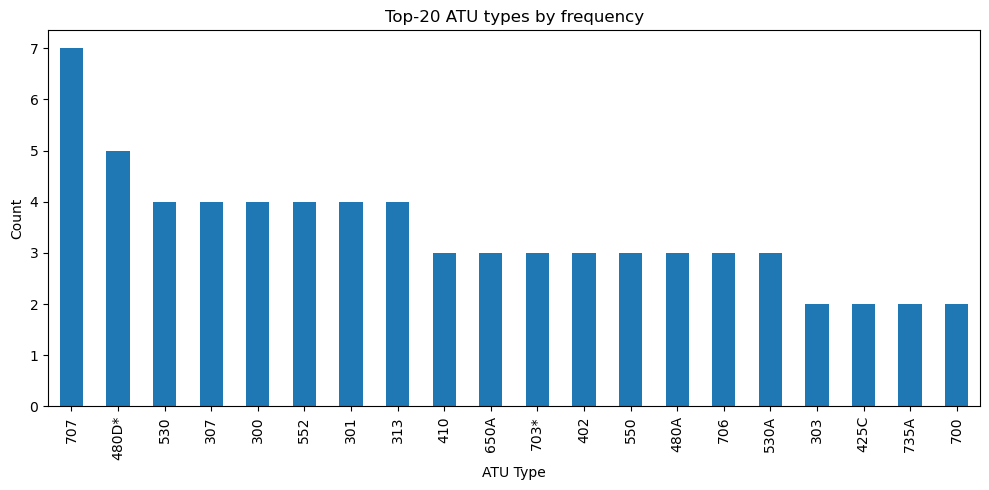

In [ ]:
# base-level counts: sum all observed codes by their base number
base_counts = (
    hier[hier["observed_count"] > 0]
    .groupby("type")["observed_count"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
base_counts.head(20).plot(kind="bar")
plt.title("Top-20 ATU types by frequency")
plt.xlabel("ATU Type")
plt.ylabel("Count")
plt.tight_layout()

out_png = project_root / "notebooks" / "figures" / "atu_base_top20.png"
plt.savefig(out_png, dpi=200)
print("Saved:", out_png)